<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN)_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


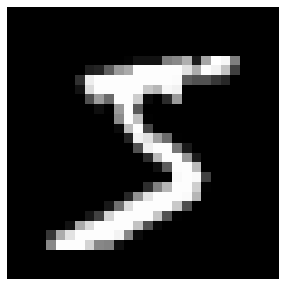

In [ ]:
import matplotlib.pyplot as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap='gray')
    plt.axis('off')
    plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

#정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255
0.0 1.0
0.0 1.0


In [ ]:
#채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
x_train_in_1 = x_train[:, tf.newaxis]
x_train_in_2 = x_train[:, :, tf.newaxis]
x_train_in_3 = x_train[:, tf.newaxis, :]
print(x_train_in_1.shape, x_train_in_2.shape, x_train_in_3.shape)

(60000, 1, 28, 28) (60000, 28, 1, 28) (60000, 1, 28, 28)


In [ ]:
#Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
        #Convolution 적용 (32 filters)
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
        #Max Pooling 적용
        tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
        #Classifier 출력층
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2223 - accuracy: 0.9371 - val_loss: 0.0947 - val_accuracy: 0.9721
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0829 - accuracy: 0.9761 - val_loss: 0.0734 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0609 - accuracy: 0.9824 - val_loss: 0.0647 - val_accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.0536 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0695 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0494 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0524 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0523 - accuracy: 0.9835


[0.05231544375419617, 0.9835000038146973]

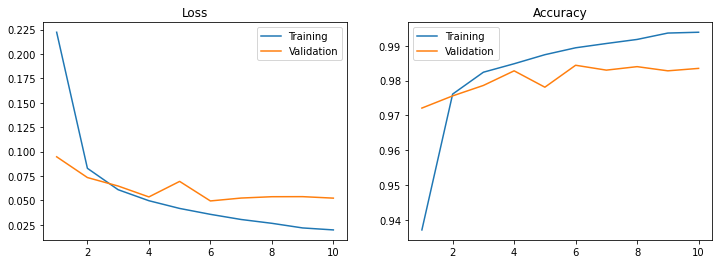

In [ ]:
def plot_loss_acc(histroy, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    gif, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch+1), loss, label='Training')
    axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label='Training')
    axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

2-3 모델 구조 파악

In [ ]:
#모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
#레이어
model.layers

In [ ]:
#첫 번째 레이어 선택
model.layers[0]

In [ ]:
#첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
#첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
#첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.3179683 , -0.19231676,  0.5699859 , -0.63919777,
           -0.96152383, -0.06314589,  0.1757857 , -1.3357903 ,
            0.20968069, -1.0724602 , -0.8457967 ,  0.2720039 ,
            0.20323598, -0.45422664,  0.13700496,  0.32674998,
           -0.81115913,  0.119503  ,  0.40814108,  0.2923067 ,
            0.06146918,  0.19871908, -0.33874035,  0.15128309,
            0.2286985 , -0.10192743,  0.09356417, -0.53271246,
           -0.59232765,  0.2641499 ,  0.20987205,  0.17597434]],
 
         [[ 0.10875773,  0.24158424,  0.1391185 , -0.47859016,
           -0.9149308 ,  0.03267779,  0.24353687, -0.99400467,
            0.13378072, -0.53832865, -0.0123609 ,  0.52018553,
            0.1250327 , -0.0054252 ,  0.26648813,  0.08826998,
           -0.20256332,  0.5126578 ,  0.1344542 ,  0.11744435,
           -0.55977297, -0.41906556,  0.3506123 ,  0.1695523 ,
            0.76989913, -0.02552646,  0.40

In [ ]:
#레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
#샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

2

In [ ]:
#첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

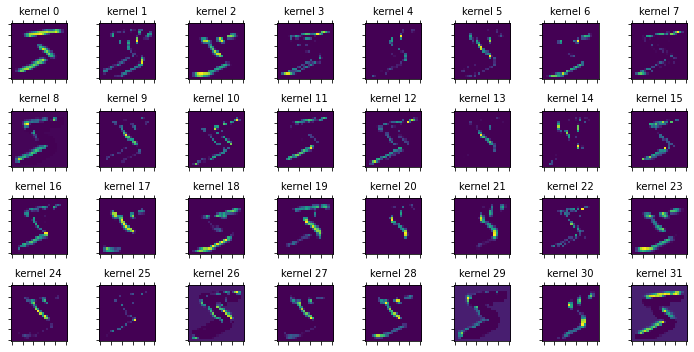

In [ ]:
#Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
#두 번째 레이어(pool) 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


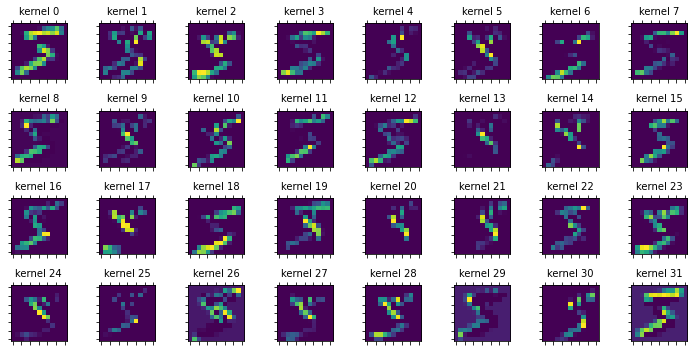

In [ ]:
#시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap = 'viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

#3. 복잡한 모델 생성

##3-1 데이터셋 준비 

In [ ]:
import tensorflow as tf
import numpy as np

#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_trian), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
#새로운 출력 값 배열 생성(홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y%2==0:  y_train_odd.append(0)
    else:       y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
#Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y%2==0:  y_valid_odd.append(0)
    else:       y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [ ]:
#정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

#채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


##3-2 functional API로 다중 입력, 다중 출력 레이어 생성

In [ ]:
#Functional API를 사용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs, outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 26, 26, 32)   320         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_2[0][0]']               
                                                                                                  
 flatten_6 (Flatten)            (None, 5408)         0           ['max_pooling2d_1[0][0]']        
                                                                                            

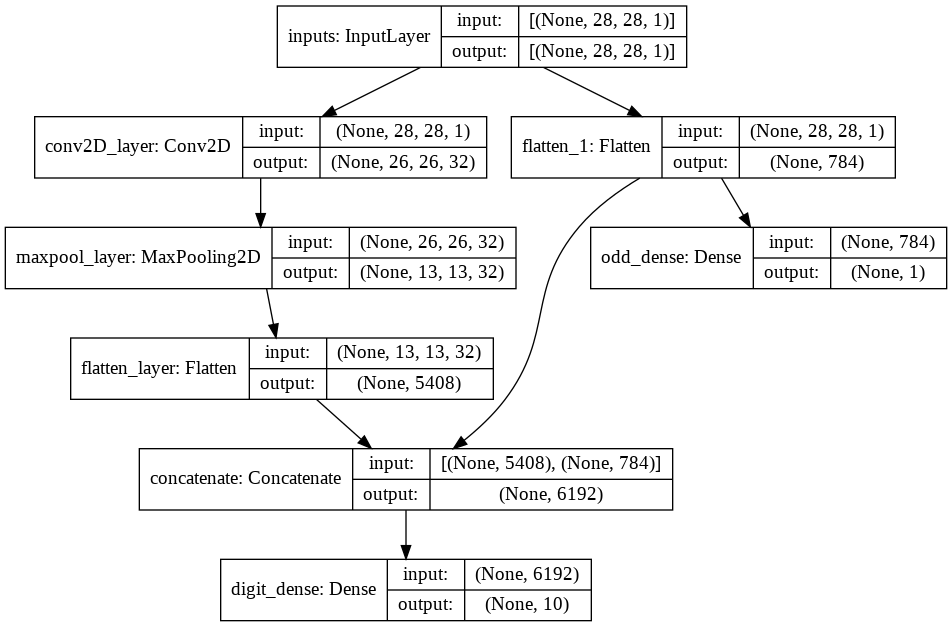

In [ ]:
#모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

#모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2083 - accuracy: 0.9404 - val_loss: 0.0876 - val_accuracy: 0.9741
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0785 - accuracy: 0.9772 - val_loss: 0.0709 - val_accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0599 - accuracy: 0.9821 - val_loss: 0.0634 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0554 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0562 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0551 -

##3-3 다중 출력 분류 모델

In [ ]:
#Functional API를 사용해 모델 생성
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2D_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2D_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2D_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                              

In [ ]:
#모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


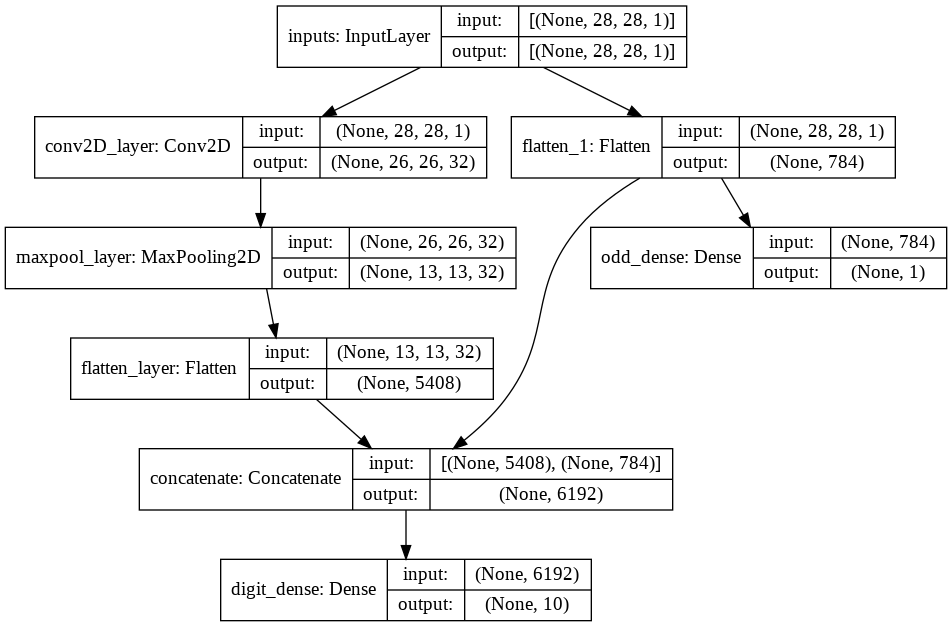

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
#모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5},
              #loss = 1.0 *sparse_categorical_crossentropy+0.5 * binary_crossentropy
              metrics=['accuracy'])
#모델 훈련
history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd}, 
                    validation_data=({'inputs':x_valid_in}, {'digit_dense': y_valid, 'odd_dense':y_valid_odd}), 
                    epochs=10)


Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3769 - digit_dense_loss: 0.2164 - odd_dense_loss: 0.3210 - digit_dense_accuracy: 0.9376 - odd_dense_accuracy: 0.8659 - val_loss: 0.2237 - val_digit_dense_loss: 0.0861 - val_odd_dense_loss: 0.2752 - val_digit_dense_accuracy: 0.9749 - val_odd_dense_accuracy: 0.8900
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2150 - digit_dense_loss: 0.0793 - odd_dense_loss: 0.2713 - digit_dense_accuracy: 0.9765 - odd_dense_accuracy: 0.8914 - val_loss: 0.1988 - val_digit_dense_loss: 0.0670 - val_odd_dense_loss: 0.2635 - val_digit_dense_accuracy: 0.9796 - val_odd_dense_accuracy: 0.8967
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1923 - digit_dense_loss: 0.0611 - odd_dense_loss: 0.2625 - digit_dense_accuracy: 0.9822 - odd_dense_accuracy: 0.8961 - val_loss: 0.2037 - val_digit_dense_loss: 0.0735 - val_odd_dense_loss: 0.2604 - val_digit_dense_accuracy: 0.9757 -

In [ ]:
#모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 7ms/step - loss: 0.1904 - digit_dense_loss: 0.0620 - odd_dense_loss: 0.2568 - digit_dense_accuracy: 0.9827 - odd_dense_accuracy: 0.9008


[0.19035790860652924,
 0.06197682023048401,
 0.25676238536834717,
 0.982699990272522,
 0.9007999897003174]

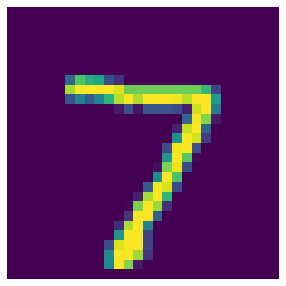

In [ ]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis('off')
    plt.show()

plot_image(x_valid, 0)

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[1.4680368e-12 1.2607772e-10 3.1667728e-09 1.9487470e-06 4.3543540e-11
 9.3066092e-14 6.4178339e-20 9.9999809e-01 7.5920008e-09 8.6107601e-09]
[0.99948084]


In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
odd_labels = (odd_preds >0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

##3-4 전이 학습(transfer learning)

In [ ]:
#앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

#앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(model.input, base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


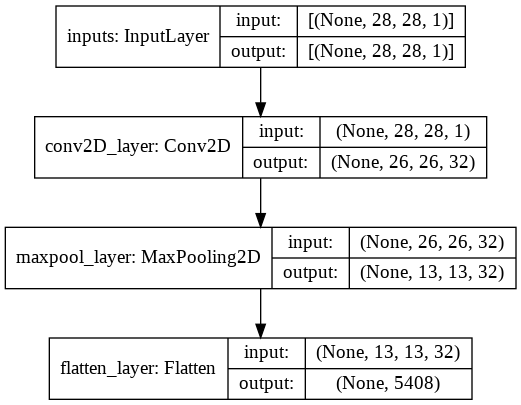

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
#Sequentail API 적용
digit_model = tf.keras.Sequential([
                                   base_model, 
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(digit_model.input)
print(digit_model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='base_input'), name='base_input', description="created by layer 'base_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [ ]:
#plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

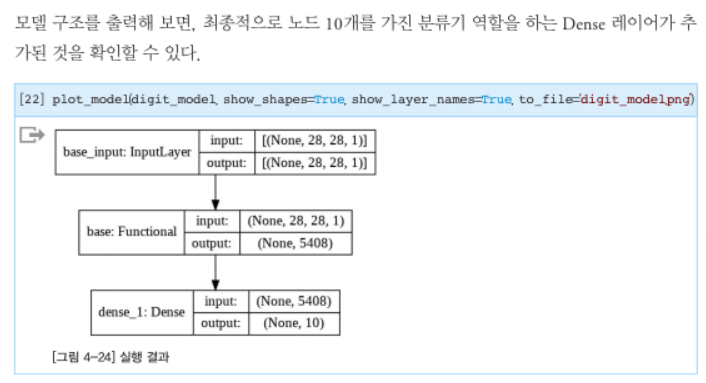

왜 안되는지 모르겠어...

In [ ]:
#모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#모델 훈련
history = digit_model.fit(x_train_in, y_trian, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1321 - accuracy: 0.9634 - val_loss: 0.0688 - val_accuracy: 0.9785
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0580 - accuracy: 0.9832 - val_loss: 0.0582 - val_accuracy: 0.9813
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0583 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0576 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0600 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0554 -

In [ ]:
#베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
#Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(base_model_frozen.input, dense_output)
digit_model_frozen.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
#모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1160 - accuracy: 0.9690 - val_loss: 0.0659 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0496 - accuracy: 0.9856 - val_loss: 0.0487 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0554 - val_accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0516 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0519 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0557 - val_ac

In [ ]:
#베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(model.input, base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2D_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
#Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(base_model_frozen2.input, dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
#모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1186 - accuracy: 0.9683 - val_loss: 0.0552 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.0483 - val_accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0547 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0491 - val_accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0553 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0556 - val_ac